## Legacy Code from https://arxiv.org/pdf/1806.07572.pdf section 4.1 page 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
1d input x_i and x_j, alias to x and x' in the paper
for 2d input we should use np.meshgrid or np.mgrid
"""

num_input = 100

x_i = np.linspace(0.0, 1.0, num=num_input)
x_j = np.linspace(0.0, 1.0, num=num_input)
# x = np.random.uniform(size=num_input)

# take outer product of x_i and x_j to get 100 x 100 matrix
# in the paper sigma was defined entry-wise, but we want to compute the matrix at once
n_0 = 1
beta = 0.01

def calc_sigma_1(x_i, x_j):
    return np.outer(x_i, x_j) / n_0 + beta**2

In [3]:
"""
f(x_i) and f(x_j) follow N(0, cov) where cov is a contatenation of 4 smaller matrices
"""
cov_ii = calc_sigma_1(x_i, x_i)
cov_ij = calc_sigma_1(x_i, x_j)
cov_ji = calc_sigma_1(x_j, x_i)
cov_jj = calc_sigma_1(x_j, x_j)

# concatenate the 4 sigmas
v1 = np.vstack((cov_ii, cov_ji))
v2 = np.vstack((cov_ij, cov_jj))

cov = np.hstack((v1, v2))

In [4]:


"""
activation functions and their derivatives
"""

def relu_kth(x, k):
    return np.maximum(x**k, 0)

def relu(x):
    return np.maximum(x, 0)

def d_relu(x):
    return 1.0 * (x > 0)

def d_relu_kth(x, k):
    return k * x**(k-1) * (x > 0)

# def is_pos_def(x):
#     return np.all(np.linalg.eigvals(x) > 0)

In [5]:
"""
gaol: approximate expectation using a finite sum and take the mean
now sample Y_i, Y_j from this distribution N(0, cov)
sample and compute outer product first, then take mean
"""
def calc_sigma_2(activation):
    mean = [0] * 2 * num_input
    num_samples = 1000
    sum_N = np.zeros((num_input, num_input))
    for i in range(num_samples):
        sample = np.random.multivariate_normal(mean, cov, size=1)[0]
        f_xi = sample[:num_input]
        prod = np.outer(activation(f_xi), activation(f_xi))
        sum_N += np.outer(activation(f_xi), activation(f_xi))

    sigma_2 = (sum_N / num_samples) + beta**2
    
    return sigma_2

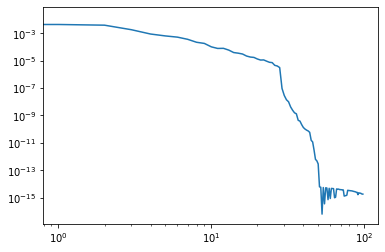

In [6]:
"""
Compute Theta 1 and 2 using Sigma
"""

THETA_1 = calc_sigma_1(x_i, x_j)

sigma_2 = calc_sigma_2(relu)
sigma_2_prime = calc_sigma_2(d_relu)

THETA_2 = np.multiply(THETA_1, sigma_2_prime) + sigma_2

eigenvalues = np.linalg.eigvals(THETA_2)
plt.loglog(eigenvalues[1:])